In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
google = pd.read_csv('/Users/dayallenragunathan/Downloads/googl_data_2020_2025.csv')

In [19]:
print(google.duplicated().sum())
print(google.isna().sum())

0
Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64


In [20]:
print(google.head())

                       Price    Adj Close        Close         High  \
0                     Ticker        GOOGL        GOOGL        GOOGL   
1                       Date          NaN          NaN          NaN   
2  2020-01-02 00:00:00+00:00  68.18682098  68.43399811  68.43399811   
3  2020-01-03 00:00:00+00:00  67.83010101   68.0759964      68.6875   
4  2020-01-06 00:00:00+00:00  69.63805389  69.89050293  69.91600037   

           Low         Open    Volume  
0        GOOGL        GOOGL     GOOGL  
1          NaN          NaN       NaN  
2  67.32450104  67.42050171  27278000  
3  67.36599731  67.40000153  23408000  
4  67.55000305  67.58149719  46768000  


In [21]:
google.dropna(subset='Adj Close', inplace=True)
print(google.isna().sum())

Price        0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [22]:
print(google.head())

                       Price    Adj Close        Close         High  \
0                     Ticker        GOOGL        GOOGL        GOOGL   
2  2020-01-02 00:00:00+00:00  68.18682098  68.43399811  68.43399811   
3  2020-01-03 00:00:00+00:00  67.83010101   68.0759964      68.6875   
4  2020-01-06 00:00:00+00:00  69.63805389  69.89050293  69.91600037   
5  2020-01-07 00:00:00+00:00  69.50354767  69.75550079  70.17500305   

           Low         Open    Volume  
0        GOOGL        GOOGL     GOOGL  
2  67.32450104  67.42050171  27278000  
3  67.36599731  67.40000153  23408000  
4  67.55000305  67.58149719  46768000  
5  69.57800293  70.02300262  34330000  


In [23]:
pd.options.display.max_columns = 20
'''or
pd.set_option('max_columns', 20)'''

#clean first two rows
google.drop(index = 0, inplace = True)

#change col names
google.rename(columns={'Price':'Date'}, inplace = True)

#change date column to proper format
google['Date'] = pd.to_datetime(google['Date']).dt.strftime('%Y-%m-%d')

print(google.head())

         Date    Adj Close        Close         High          Low  \
2  2020-01-02  68.18682098  68.43399811  68.43399811  67.32450104   
3  2020-01-03  67.83010101   68.0759964      68.6875  67.36599731   
4  2020-01-06  69.63805389  69.89050293  69.91600037  67.55000305   
5  2020-01-07  69.50354767  69.75550079  70.17500305  69.57800293   
6  2020-01-08  69.99825287   70.2519989  70.59249878  69.63150024   

          Open    Volume  
2  67.42050171  27278000  
3  67.40000153  23408000  
4  67.58149719  46768000  
5  70.02300262  34330000  
6  69.74099731  35314000  


In [24]:
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

# Convert columns to float
google[numeric_cols] = google[numeric_cols].apply(pd.to_numeric, errors="coerce")


print(google.dtypes)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [25]:
#Compute daily price change (%)

google["Price Change (%)"] = google["Close"].pct_change() * 100
google.dropna(inplace=True)

print(google.head())

         Date  Adj Close      Close       High        Low       Open  \
3  2020-01-03  67.830101  68.075996  68.687500  67.365997  67.400002   
4  2020-01-06  69.638054  69.890503  69.916000  67.550003  67.581497   
5  2020-01-07  69.503548  69.755501  70.175003  69.578003  70.023003   
6  2020-01-08  69.998253  70.251999  70.592499  69.631500  69.740997   
7  2020-01-09  70.733093  70.989502  71.433998  70.510498  71.096497   

     Volume  Price Change (%)  
3  23408000         -0.523134  
4  46768000          2.665413  
5  34330000         -0.193162  
6  35314000          0.711769  
7  33200000          1.049797  


In [26]:
correlation = google['Close'].corr(google['Price Change (%)'])
print(f'Correlation between Closing Price and Price Change is {correlation:.3f}')

if correlation >= 0.5:
    print('Correlation is positive')
elif correlation <= -0.5:
    print('Correlation is negative')
else:
    print('No Correlation')

Correlation between Closing Price and Price Change is 0.030
No Correlation


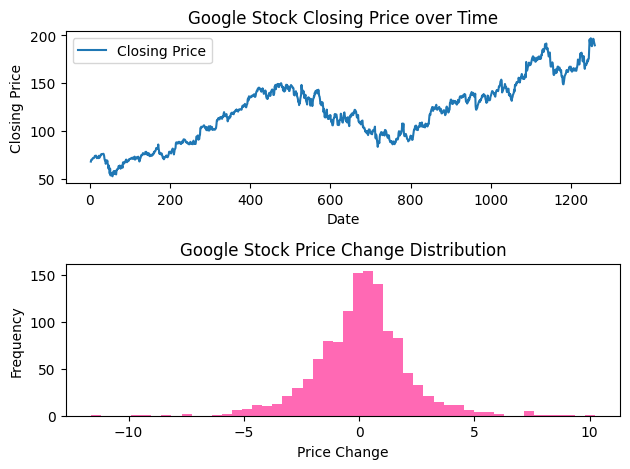

In [27]:
#Plot 1
plt.subplot(2, 1, 1)
plt.plot(google.index, google['Close'], label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Stock Closing Price over Time')
plt.legend()

#Plot 2
plt.subplot(2, 1, 2)
plt.hist(google['Price Change (%)'], bins = 50, color = 'hotpink')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.title('Google Stock Price Change Distribution')


plt.tight_layout()
plt.show()


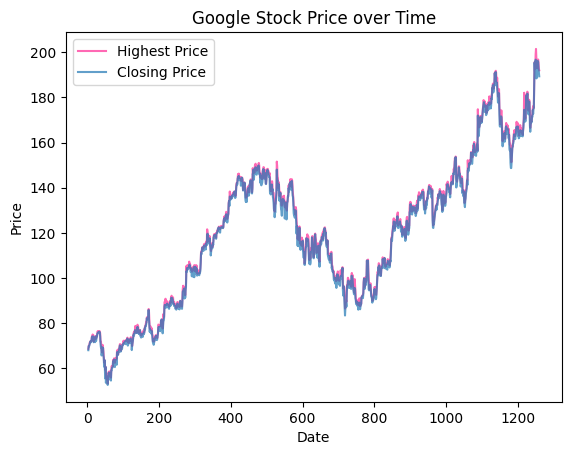

In [28]:
#Plot 2
plt.plot(google.index, google['High'], label = 'Highest Price', color = 'hotpink')
#Plot 1
plt.plot(google.index, google['Close'], label = 'Closing Price', alpha = 0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price over Time')
plt.legend()

plt.show()